<a id="goal"></a>
## Project description & Goal

<font color='blue'>
    
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems gyms and other services face is customer churn.
    
The task is to analyze the customer profiles and come up with a customer retention strategy.    

## Step 1. Open the data file and study the general information. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans 
import warnings
import sys
import plotly.express as px
from sklearn.metrics import confusion_matrix

In [3]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [5]:
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [6]:
data.shape

(4000, 14)

## Conclusion

<font color='blue'>
We have data on 4000 observation(customer) with 13 features and the the target variable is churn.    

<a id="EDA"></a>
## Step 2. Carry out exploratory data analysis (EDA)

In [7]:
data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [8]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
data.columns=data.columns.str.lower()

In [10]:
data.churn.value_counts()

0    2939
1    1061
Name: churn, dtype: int64

In [11]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<font color='blue'>
    
The avarage of features: partner, promo_friends, contract_period, lifetime, group_visits, avg_class_frequency is higher for those how stayed than they left.

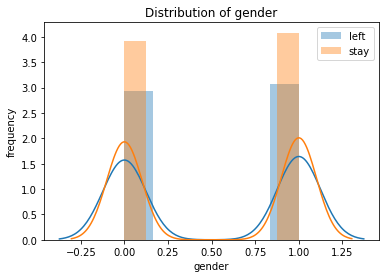

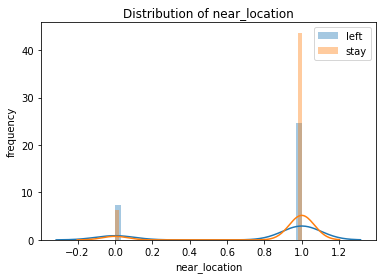

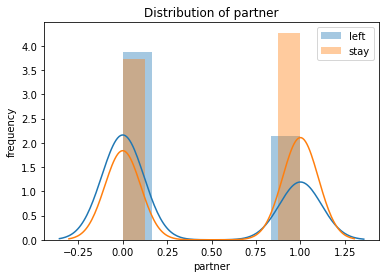

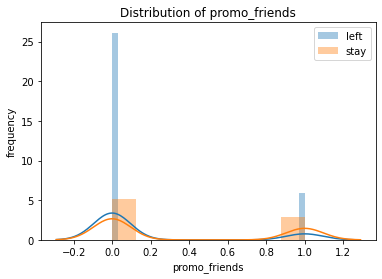

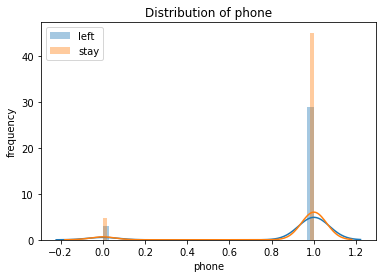

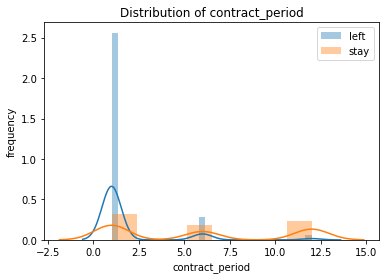

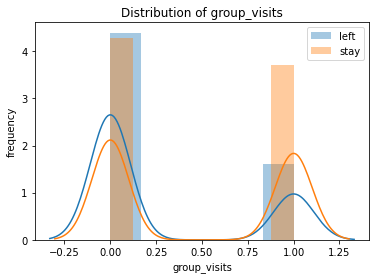

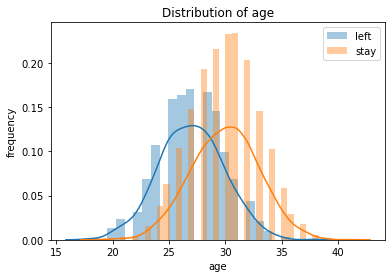

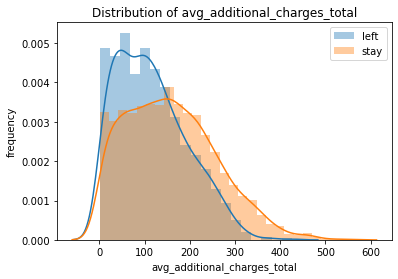

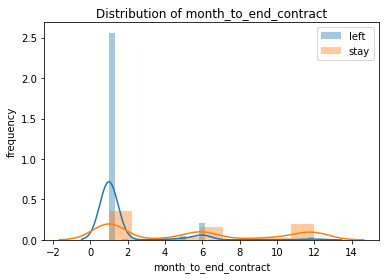

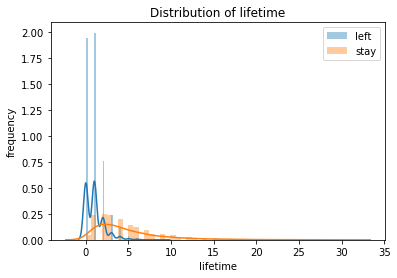

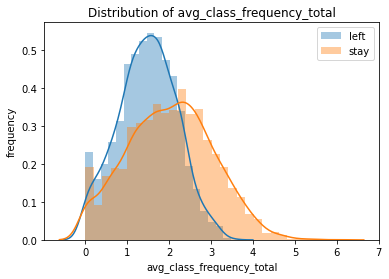

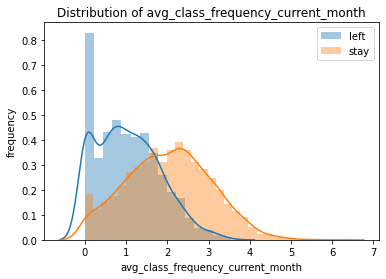

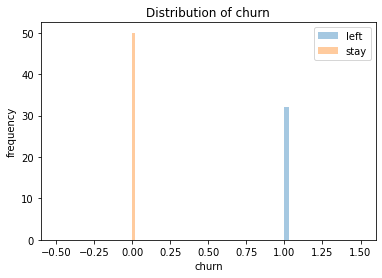

In [12]:
for col in data.columns:
    sns.distplot(data.query('churn==1')[col], label='left')
    sns.distplot(data.query('churn==0')[col], label='stay')
    plt.title('Distribution of {}'.format(col))
    plt.ylabel('frequency')
    plt.legend()
    plt.show()

In [13]:
cm = data.corr()

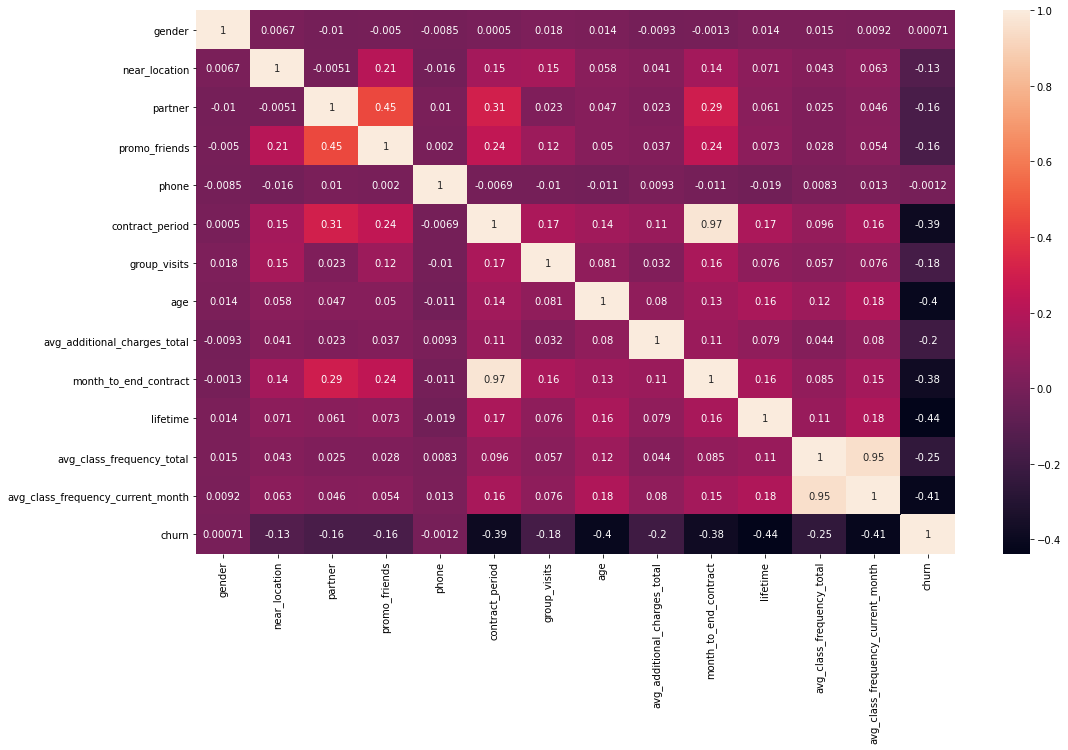

In [14]:
plt.figure(figsize=(17,10))
sns.heatmap(cm, annot=True)
plt.show()

<font color='blue'>
Only in two cases is high correlation seen:     
Month_to_end_contract and Contract_period,     
Avg_class_frequency_current_month and Avg_class_frequency_total, which is normal.
    
the correlation between Promo_friends and Partner is 0.45. It Shows that employees in the partner companies have encouraged their colleagues to do sports.

the correlation between churn(target variable) and features is higher for: 
   - lifetime 
   - avg_class_frequency_current_month 
   - contract_period.  

## Conclusion

<font color='blue'>
There are no missing value and no significant outlier in the data.  

The average of features below is higher for those who stayed than they left:
   - partner 
   - promo_friends
   - contract_period
   - lifetime
   - group_visits
   - avg_class_frequency 
 
    
the correlation between churn(target variable) and features is higher for: 
   - lifetime 
   - avg_class_frequency_current_month 
   - contract_period.     

<a id="model"></a>
## Step 3. Build a model to predict user churn

In [15]:
X = data.drop('churn', axis=1)
y = data['churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
models = [LogisticRegression(), RandomForestClassifier()]

In [18]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:,1]
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('Roc_auc:{:.2f}'.format(roc_auc_score(y_test, probabilities)))

In [23]:
model= LogisticRegression()

In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.score(X_test,y_test)

0.90625

In [18]:
for i in models:
    print(i)
    make_prediction(i,X_train, y_train, X_test, y_test)

LogisticRegression()
Accuracy: 0.91
Precision: 0.82
Recall: 0.80
Roc_auc:0.96
RandomForestClassifier()
Accuracy: 0.92
Precision: 0.85
Recall: 0.80
Roc_auc:0.97


In [19]:
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
TN, FP, FN, TP = cm.ravel()

In [20]:
TN, FP, FN, TP

(572, 30, 34, 164)

In [21]:
importances = final_model.feature_importances_

In [22]:
df=pd.DataFrame([X.columns,importances]).T

In [23]:
df.columns=['feature','importance']

In [24]:
df.sort_values('importance', ascending=False)

,feature,importance
10,lifetime,0.287122
12,avg_class_frequency_current_month,0.178853
11,avg_class_frequency_total,0.128535
7,age,0.113175
8,avg_additional_charges_total,0.0907393
9,month_to_end_contract,0.0680985
5,contract_period,0.0660317
6,group_visits,0.0165353
2,partner,0.0118706
0,gender,0.0116091


## Conclusion

<font color='blue'>
We choose two models: logistic regression and random forest.  
Train the data with two methods and compare them on accuracy, precision, recall and Roc_auc Metrics. Both models seems to be good and and predict over 90% correctly, but RandomForestClassifier has better metrics and will give better results. So, we choose RandomForestClassifier.<br>
We also check the importance of the featurs. <br>The most important feature by RandomForestClassifier model is lifetime.    

<a id="cluster"></a>
## Step 4. Create user clusters

<font color='blue'>
First we standardize the data and then plot a dendrogram on a sample of data to estimate the number of clusters we can single out.

In [25]:
Scaler=StandardScaler()

In [26]:
X_sc = Scaler.fit_transform(data.sample(1000))

In [27]:
linked = linkage(X_sc, method = 'ward') 

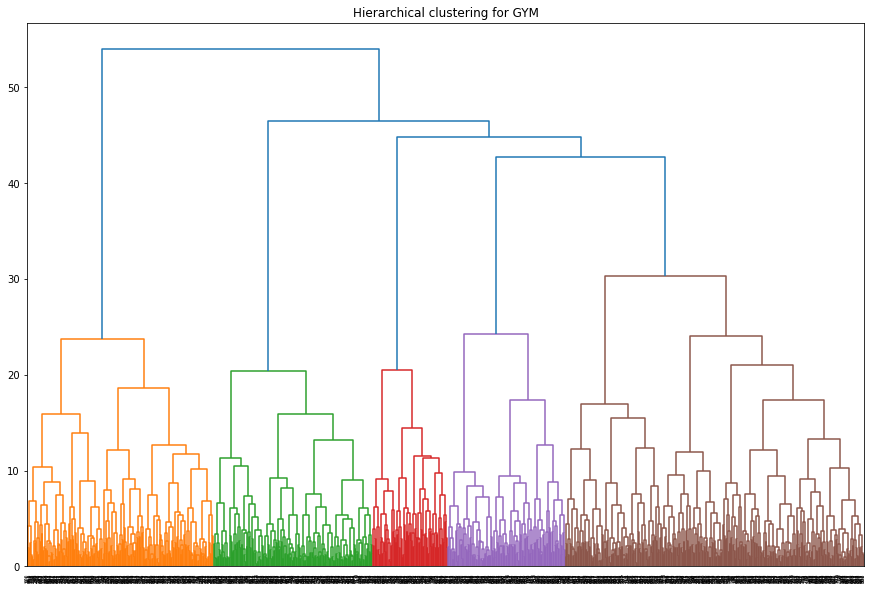

In [28]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for GYM')
plt.show() 

<font color='blue'>
We let the number of clusters be n=5 and train the clustering model with the K-means algorithm and predict customer clusters.     

In [29]:
X_sc = Scaler.fit_transform(data)

In [30]:
len(X_sc)

4000

In [31]:
km = KMeans(n_clusters = 5,random_state=0 ) 
labels = km.fit_predict(X_sc)

In [32]:
data['cluster_km'] = labels

In [33]:
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,4
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,4
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


In [34]:
data_group_mean = data.groupby(['cluster_km']).mean().reset_index()

In [35]:
data_group_mean

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,1,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
2,2,0.548951,0.843823,0.368298,0.210956,0.998834,2.687646,0.438228,29.981352,161.303859,2.474359,4.615385,2.910943,2.918375,0.006993
3,3,0.475029,0.825784,0.457607,0.262485,1.000000,2.753775,0.383275,30.036005,151.136111,2.551684,4.641115,1.165759,1.164325,0.001161
4,4,0.504175,0.938413,0.768267,0.563674,1.000000,11.204593,0.560543,29.878914,162.665312,10.257829,4.711900,2.027649,2.021806,0.015658


<font color='blue'>
    
Looking at the mean feature values for clusters, shows that clusters are more different on these features: 
    
   - near_location 
   - partner  
   - promo_friends  
   - contract_period  
   - avg_class_frequency_current_month

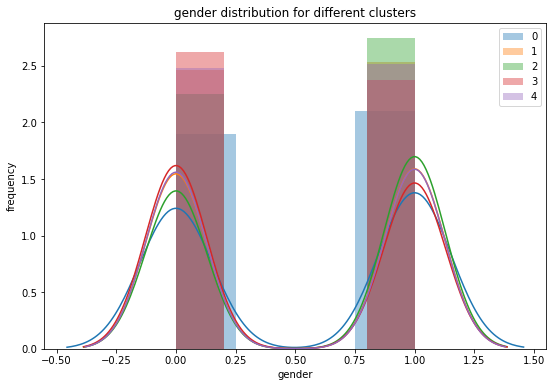

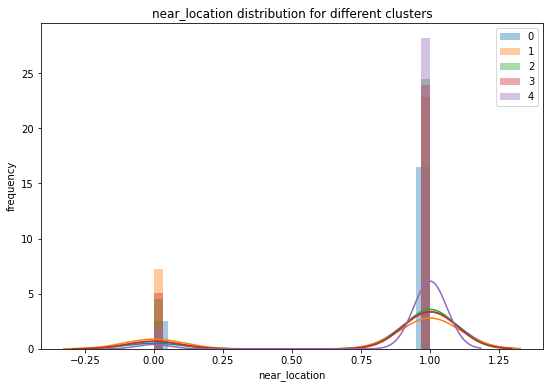

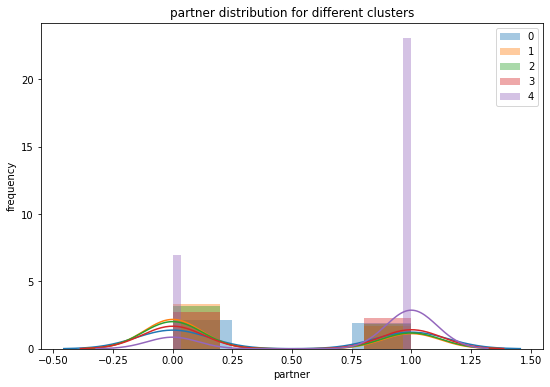

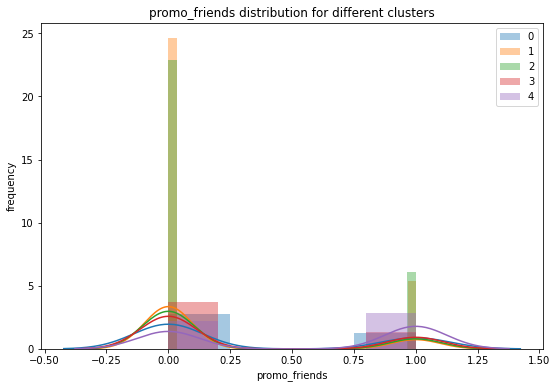

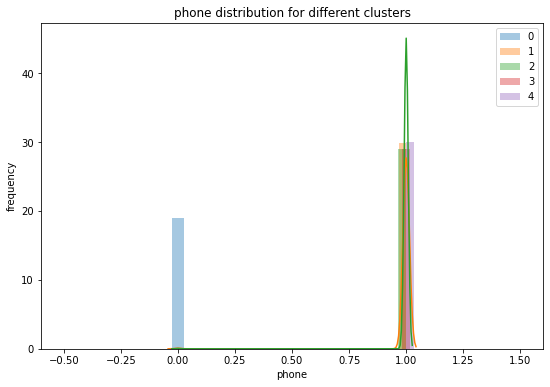

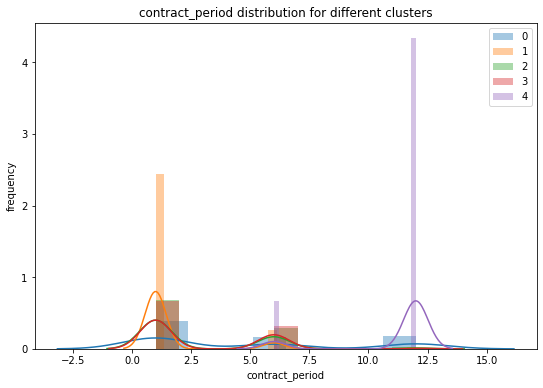

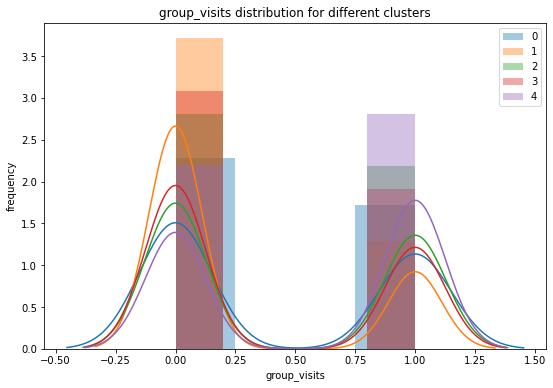

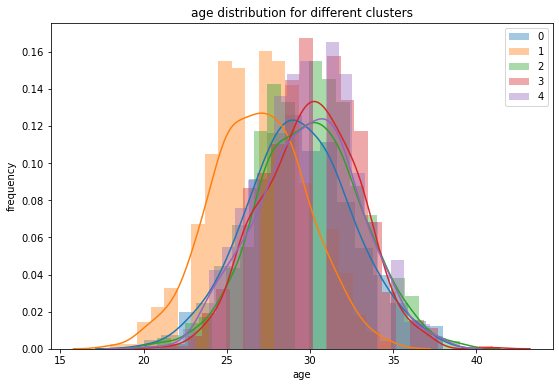

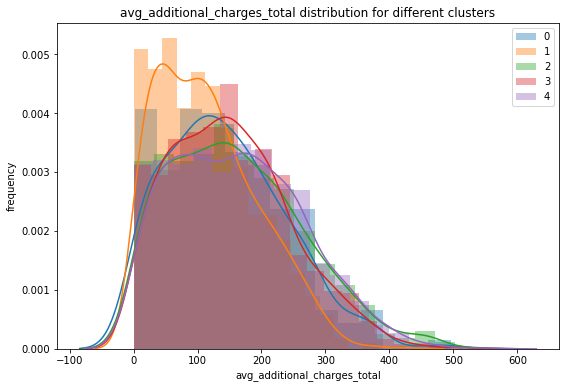

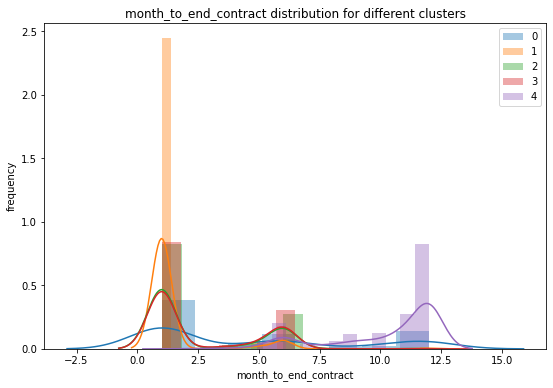

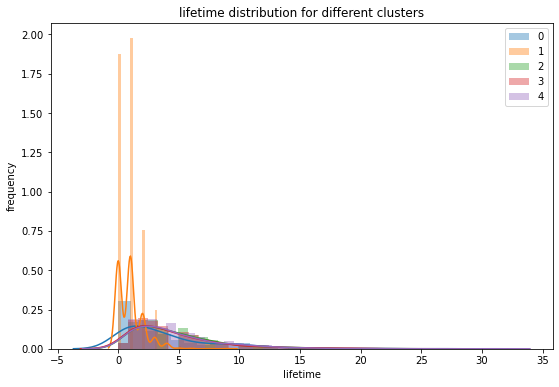

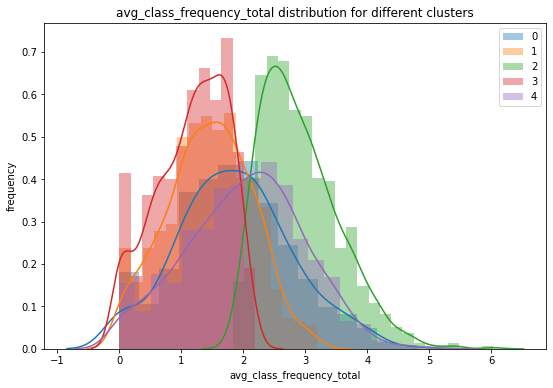

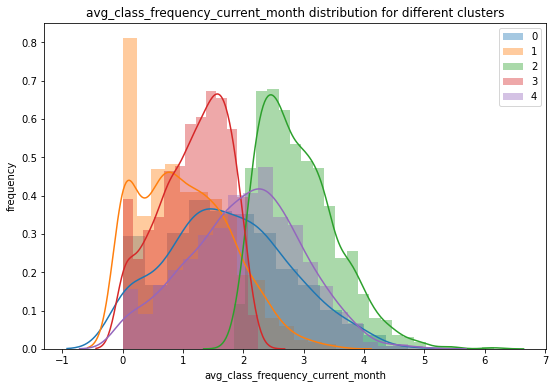

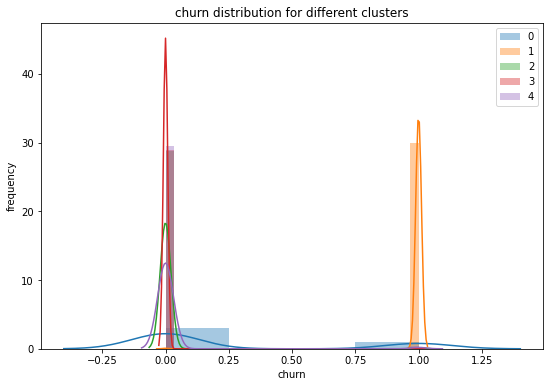

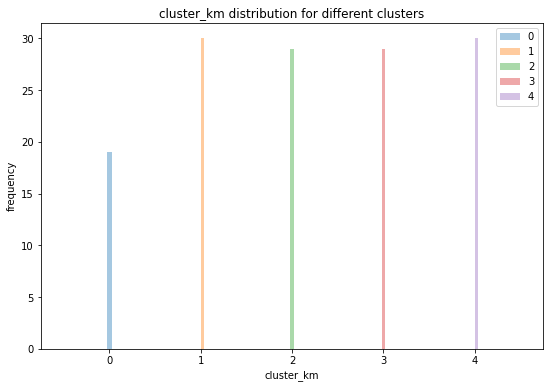

In [36]:
for col in data.columns:
    plt.figure(figsize=(9,6))
    sns.distplot(data.query('cluster_km==0')[col], label='0')
    sns.distplot(data.query('cluster_km==1')[col], label='1')
    sns.distplot(data.query('cluster_km==2')[col], label='2')
    sns.distplot(data.query('cluster_km==3')[col], label='3')
    sns.distplot(data.query('cluster_km==4')[col], label='4')
    plt.legend()
    #plt.xlabel('{}'.format (col))
    plt.ylabel('frequency')
    plt.title('{} distribution for different clusters'.format(col))
    plt.show()

In [37]:
data_group_mean

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.526178,0.869110,0.471204,0.308901,0.000000,4.816754,0.429319,29.340314,144.517762,4.502618,3.955497,1.857525,1.727260,0.261780
1,1,0.506908,0.759830,0.341126,0.179596,0.996812,1.566419,0.257173,26.907545,114.993470,1.513284,0.975558,1.448150,1.025562,0.997875
2,2,0.548951,0.843823,0.368298,0.210956,0.998834,2.687646,0.438228,29.981352,161.303859,2.474359,4.615385,2.910943,2.918375,0.006993
3,3,0.475029,0.825784,0.457607,0.262485,1.000000,2.753775,0.383275,30.036005,151.136111,2.551684,4.641115,1.165759,1.164325,0.001161
4,4,0.504175,0.938413,0.768267,0.563674,1.000000,11.204593,0.560543,29.878914,162.665312,10.257829,4.711900,2.027649,2.021806,0.015658


In [38]:
data.groupby('cluster_km')['churn'].mean().reset_index().sort_values('churn')

,cluster_km,churn
3,3,0.001161
2,2,0.006993
4,4,0.015658
0,0,0.261780
1,1,0.997875


## Conclusion

<font color='blue'>
Looking at the mean of feature values for clusters, shows that clusters are more different on these features: 
    
   - near_location 
   - partner  
   - promo_friends  
   - contract_period 
   - lifetime
   - avg_class_frequency_current_month    
    
Based on the mean values and distributions, we can describe the clusters on average:
    
  - cluster 0: customers which don't live in the neighborhood but they are employee of a partner 
    company, have short contracts and lifetimes, their group visit is lower and their visits per week are medium.(churn rate = 0.26)  
   
  - cluster 2: customers which features are all in high range. specially their contracts are long and partner feature is higher for them. (churn rate= 0.006) 
    
  - cluster 1: customers which most features are low, so it has the highest churn rate.(highest churn rate = 0.99)
    
  - cluster 3: customers which  live in the neighborhood, aren't employee of a partner company, have short contracts but have high lifetime and their visits per week is very high. (lowest churn rate = 0.001)        
    
  - cluster 4: customers which live in the neighborhood, are employee of a partner company, have long contracts and their visits per week are low. (churn rate = 0.015)
    

## step 5: Overall Conclusion

<font color='blue'>
    
### [Goal](#goal) 
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data. 
The task is to analyze the customer profiles and come up with a customer retention strategy.
    
### [Exploratory data analysis (EDA)](#EDA)

There are no missing value and no significant outlier in the data.  

The average of features below is higher for those who stayed than they left:
   - partner 
   - promo_friends
   - contract_period
   - lifetime
   - group_visits
   - avg_class_frequency 
 
    
the correlation between churn(target variable) and features is higher for: 
   - lifetime 
   - avg_class_frequency_current_month 
   - contract_period.   
    
### [Build a model to predict user churn](#model)   
We choose two models: logistic regression and random forest.  
Train the data with two methods and compare them on accuracy, precision, recall and Roc_auc Metrics. Both models seems to be good and and predict over 90% correctly, but LogisticRegression has better metrics and will give better results. So, we choose LogisticRegression to predict user churn. 
We also check the importance of the featurs.
The most important feature by RandomForestClassifier model is lifetime.    

### [Create user clusters](#cluster)
We traind the clustering model with the K-means algorithm with n=5 and predict 5 customer clusters. 
    
 - cluster 0: customers which don't live in the neighborhood but they are employee of a partner company, have short contracts and lifetimes, their group visit is lower and their visits per week are medium.(churn rate = 0.26)

 - cluster 2: customers which features are all in high range. specially their contracts are long and partner feature is higher for them. (churn rate= 0.006)

 - cluster 1: customers which most features are low, so it has the highest churn rate.(highest churn rate = 0.99)

 - cluster 3: customers which live in the neighborhood, aren't employee of a partner company, have short contracts but have high lifetime and their visits per week is very high. (lowest churn rate = 0.001)

 - cluster 4: customers which live in the neighborhood, are employee of a partner company, have medium contracts and their visits per week are low. (churn rate = 0.015)
    
### Final Conclusion and Suggestions 
    
Clusters in order of loyalty are: 3,2,4,0,1  
     
Cluster 3: which includes the most loyal customers with the lowest churn rate, is the number who does not necessarily have discounts on average; But their lifetime is high, they participate in group sports and on average attend more weekly sessions. In fact, this group can be called self-motivated. The strategy can be to attract more of these people through advertising (for example, advertising in nearby parks to attract people who exercise in the surrounding area)  
    
Cluster 2: who are also loyal, are people who come from the partner companies and friends, have long-term contracts, and attend a large number of weekly meetings on average. Corporate marketing  on partner companies can also be done to attract more of these people.     

Cluster 1: with the highest churn rate represents people with short-term contracts and those who are not interested in group sports and attend less weekly sessions on average. The strategy for such people can be a maintenance strategy. For example, we can have more attractive (discounted) offers for longer-term contracts or incentives for team sports. 